# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration & Preprocessing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of Contents



---

## 0. Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

## 1. Load data

In [2]:
df = pd.read_csv('./data/spotify-2023.csv', encoding='Latin-1', thousands=',')

# get 5 random samples
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
277,Komang,Raim Laode,1,2022,8,16,158,4,137123880,5,...,134,G,Major,70,35,41,41,0,10,3
573,Don't Be Shy,"Tiï¿½ï¿½sto, Kar",2,2021,8,1,6026,0,566954746,171,...,120,B,Minor,77,51,79,20,0,26,6
535,drivers license,Olivia Rodrigo,1,2021,1,8,12685,3,1858144199,185,...,144,A#,Major,59,21,43,76,0,10,7
597,Thunder,"Prezioso, Gabry Ponte, LUM!X",3,2021,5,7,4846,10,422691058,54,...,101,C#,Major,67,40,90,3,0,34,6
780,Savior,"Kendrick Lamar, Sam Dew, Baby Keem",3,2022,5,13,2291,0,86176890,9,...,123,G#,Major,61,66,71,53,0,32,46


## 2. Basic information about the dataset

### 2.1 Context

- Most famous songs of 2023 as listed on `Spotify`

### 2.2 Meaning of each columns

| Column                 | Meaning                                                      |
|------------------------|--------------------------------------------------------------|
| `track_name`           | Name of the song.                                            |
| `artist(s)_name`       | Name of the artist(s) of the song.                           |
| `artist_count`         | Number of artists contributing to the song.                  |
| `released_year`        | Year when the song was released.                             |
| `released_month`       | Month when the song was released.                            |
| `released_day`         | Day of the month when the song was released.                 |
| `in_spotify_playlists` | Number of Spotify playlists the song is included in.        |
| `in_spotify_charts`    | Presence and rank of the song on Spotify charts.             |
| `streams`              | Total number of streams on Spotify.                         |
| `in_apple_playlists`   | Number of Apple Music playlists of the song is included in. |
| `in_apple_charts`      | Presence and rank of the song on Apple Music charts.         |
| `in_deezer_playlists`  | Number of Deezer playlists the song is included in.          |
| `in_deezer_charts`     | Presence and rank of the song on Deezer charts.              |
| `in_shazam_charts`     | Presence and rank of the song on Shazam charts.              |
| `bpm`                  | Beats per minute, a measure of song tempo.                   |
| `key`                  | Key of the song.                                             |
| `mode`                 | Mode of the song (major or minor).                           |
| `danceability_%`       | Percentage indicating how suitable the song is for dancing.  |
| `valence_%`            | Positivity of the song's musical content.                    |
| `energy_%`             | Perceived energy level of the song.                          |
| `acousticness_%`       | Amount of acoustic sound in the song.                        |
| `instrumentalness_%`   | Amount of instrumental content in the song.                  |
| `liveness_%`           | Presence of live performance elements.                       |
| `speechiness_%`        | Amount of spoken words in the song.                          |

## 3. Specific information about the dataset

### 3.1 Rows and columns

In [3]:
print(f"The number of rows is {df.shape[0]}")
print(f"The number of columns is {df.shape[1]}")

The number of rows is 953
The number of columns is 24


In [4]:
col_name = df.columns
print(f"Tên các cột của dữ liệu: {col_name}")

Tên các cột của dữ liệu: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


✅The dataset has `953` rows and `24` columns.

### 3.2 What is the meaning of each row?

✅ A row represents the information of a song (`name`, `artist_name`, `released year`,...) and some of its properties in `Spotify` in 2023.

### 3.3 Are there duplicated rows?

In [5]:
print(f"The dataset has {df.duplicated().sum()} duplicated rows")

The dataset has 0 duplicated rows


✅ There is no duplicated rows in our dataset.

### 3.4 Column data type

- Now, we will check the data type of each column.

In [6]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

✅ There are some inapropriate columns' data types:

- `streams` must be `int64` type.

🔧 Convert them to `int64` type.

In [7]:
ob_to_int_cols = ['streams']

for col in ob_to_int_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

✅ Check the data type of each column again to make sure that we have converted them successfully.

In [8]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

❌ There is a strange thing that after converting, `streams`, `in_deezer_playlists` and `in_shazam_charts` are now `float64` type not `int64` type. <br>
✅ The reason is that there are some `NaN` values in these columns. Based on the rule of `pandas`, if there is at least one `NaN` value in a `int64` column, the data type of that column will be `float64` type. This is called `upcasting`. So, for now we will leave it like that.

### 3.5 Missing values on each row

🕵️ We will check the number of missing value in each row.  <br>
- In our dataset, each row has `24` columns. So, if a row has more than `12` missing values, we will **drop** it.

In [9]:
# Count the number of missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)

# Count the number of rows for each count of missing values
count_of_missing_values = missing_values_per_row.value_counts().sort_index()

for missing_count, row_count in count_of_missing_values.items():
    percentage = round(row_count * 100.0 / df.shape[0], 2)
    print(f"The number of rows missing {missing_count} values: {row_count} rows ({percentage}%).")

total_percentage = round(sum(count_of_missing_values[1:]) * 100.0 / df.shape[0], 2)
print(f'\nThe number of rows with missing data: {sum(count_of_missing_values[1:])} ({total_percentage}%)')

The number of rows missing 0 values: 816 rows (85.62%).
The number of rows missing 1 values: 128 rows (13.43%).
The number of rows missing 2 values: 9 rows (0.94%).

The number of rows with missing data: 137 (14.38%)


✅ **Comment:** <br>
- There is no row that has more than `12` missing values. So, we don't need to drop any row. <br>
- In total, there are 137 rows that contain missing values but the number of missing values in each row is very small (`1`, `2` ).

## 4. Numerical column

🕵️ We will explore deeper all the numerical columns in our dataset. First, we will see which they are.

In [10]:
numerical_cols_df = df[df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]]
numerical_cols = list(numerical_cols_df.columns)
list(numerical_cols)

['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

✅ There are total `20` numerical columns in our dataset.

####  4.1 Missing values

🕵️ Number of missing values of each columns

In [11]:
numerical_cols_df.isna().sum()

artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

🕵️ The percentage of missing values for each columns

In [12]:
numerical_cols_df.isnull().mean() * 100

artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.104932
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     0.000000
in_deezer_charts        0.000000
in_shazam_charts        5.246590
bpm                     0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

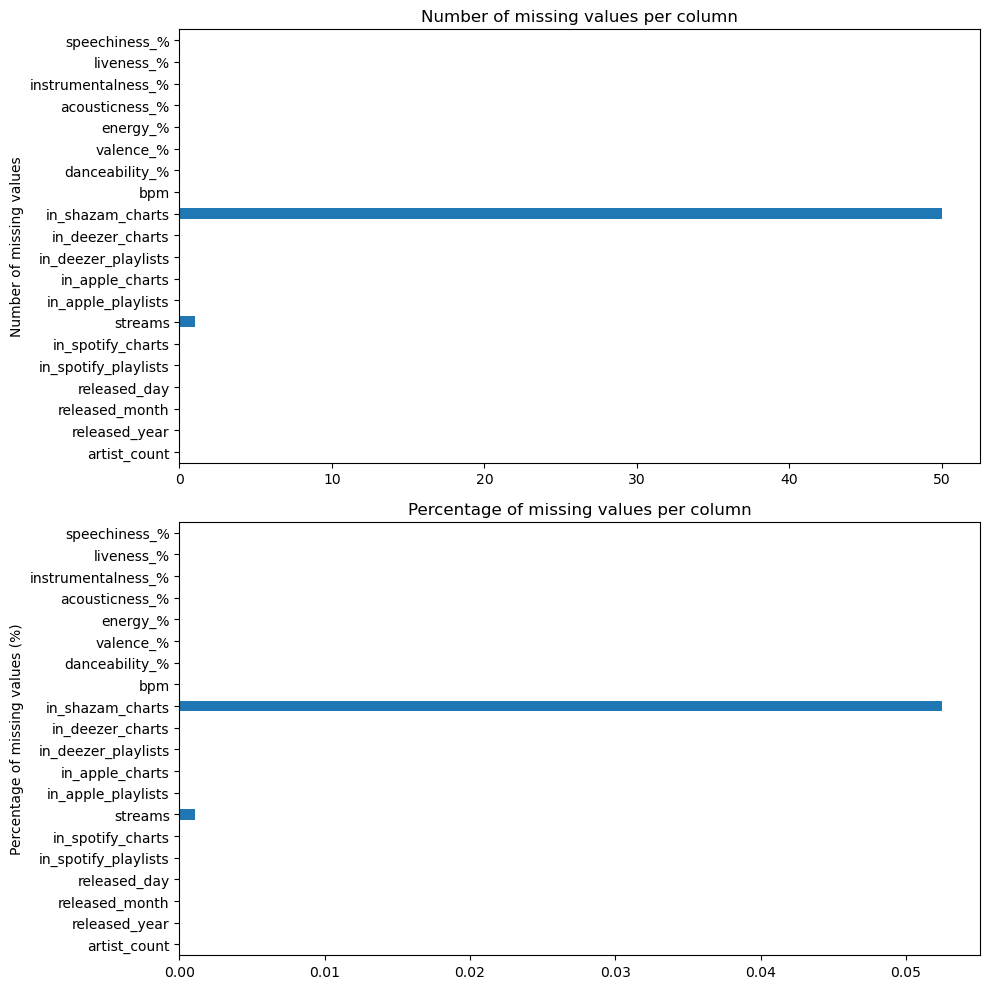

In [18]:
missing_values_per_column = numerical_cols_df.isnull().sum()
missing_values_per_column_percent = missing_values_per_column / numerical_cols_df.shape[0]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
missing_values_per_column.plot.barh(ax=ax[0])
ax[0].set_ylabel('Number of missing values')
ax[0].set_title('Number of missing values per column')
missing_values_per_column_percent.plot.barh(ax=ax[1])
ax[1].set_ylabel('Percentage of missing values (%)')
ax[1].set_title('Percentage of missing values per column')
plt.tight_layout()
plt.show()

✅**Comment:**
- There are `2` numerical columns that have missing values: `streams`, `in_deezer_playlists`, `in_shazam_charts`.
- All of them have very small percentage of missing values (`<10%`), so we don't need to drop any of them.
- We will fill the missing values in the `preprocessing` part.

🔧 Now, we will fill the missing values in these columns:
- The `streams` column has only one `NaN` value, so we will fill that value with the `median value` of the column. Because this column has `std` value is very large, so we will use `median` instead of `mean` to fill the missing value.
- For the `in_deezer_playlists` column, there is problem that there is commas in the value. So, we will remove the commas.
- `in_shazam_charts` has a significant number of missing values, so it would be best to use the `KNNImputer` to fill in the missing values. We will use `KNNImputer`to fill missing values in `in_shazam_charts` column based on the values of `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts` columns. Because these columns have the same meaning.

In [14]:
from sklearn.impute import KNNImputer

# Fill missing value for streams column
df['streams'].fillna(df['streams'].median(), inplace=True)
# Remove commas
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True)
# Fill missing value for in_shazam_charts 
k_neighbours = 3
knn_imputer = KNNImputer(n_neighbors=k_neighbours)
df[['in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts']] = knn_imputer.fit_transform(df[['in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts']])

🕵️ Check the number of missing values in each numerical column again to make sure that we have filled them successfully.

In [15]:
df[numerical_cols].isna().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

✅ Now, there is no missing value in these `3` numerical columns.

### 4.2 Distribution and descriptive statistics of numerical attributes

🕵️ Some descriptive statistics of numerical attributes

In [16]:
dfSummary(df[numerical_cols])

ModuleNotFoundError: No module named 'summarytools'

🕵️ Distribution of numerical attributes

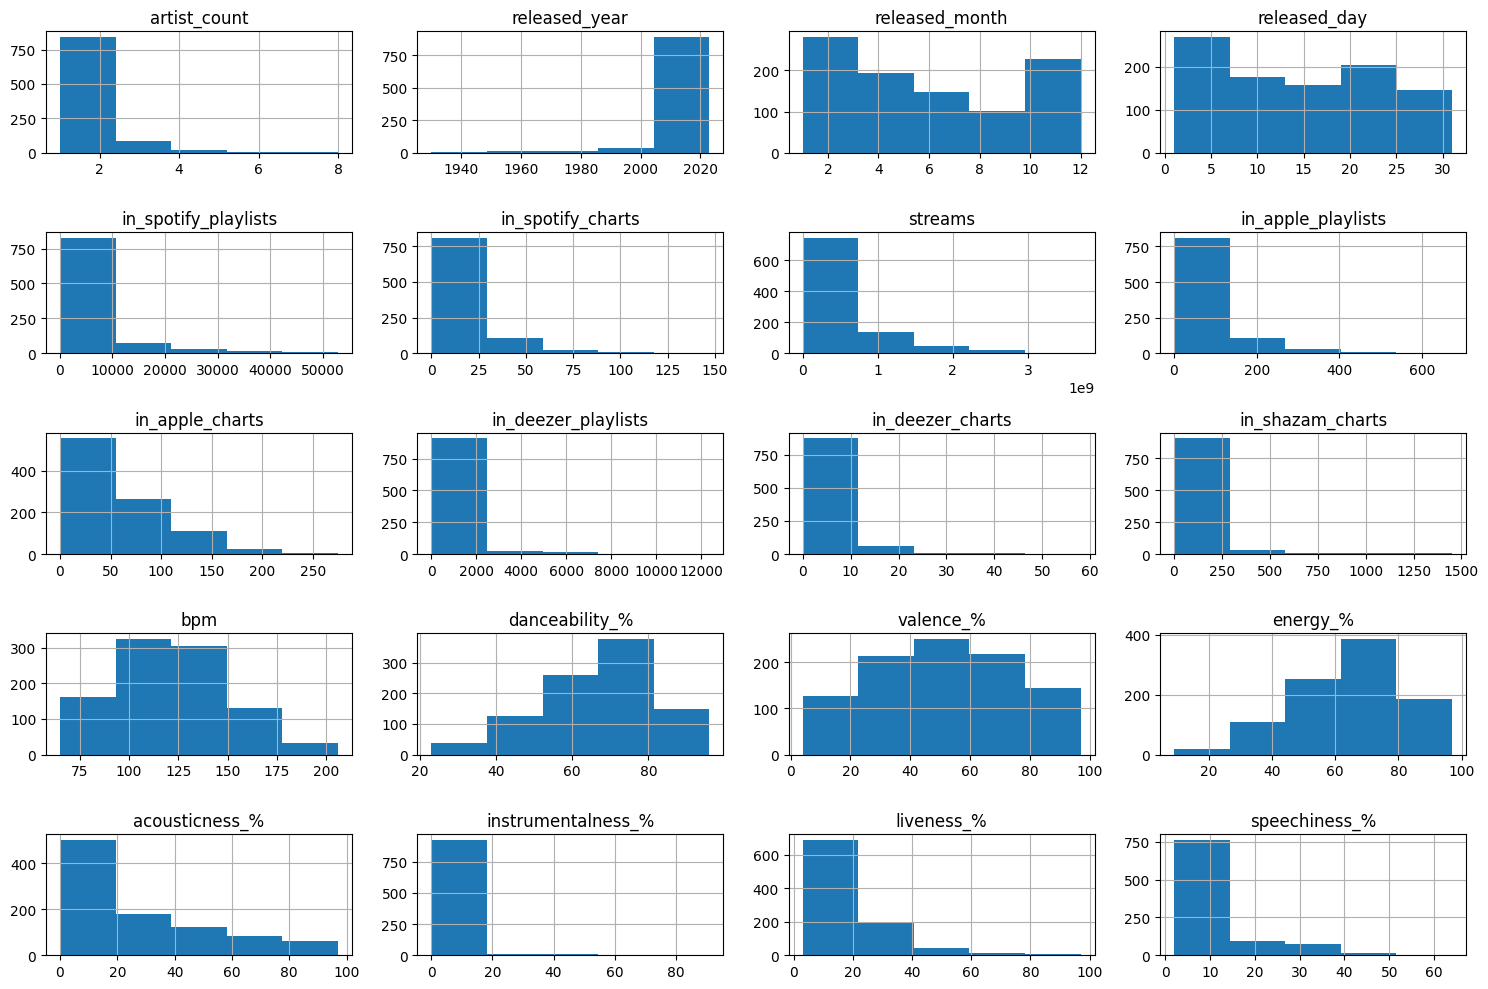

In [ ]:
df[numerical_cols].hist(figsize=(15, 10), bins=5)
plt.tight_layout()
plt.show()

✅**Comment:**
- `bpm`, `danceability_%`, `valence_%` and `energy_%` have distributions that are close to normal distributions.
- Except for `released_year`, the remaining attributes have `right-skewed distributions`. It is understandable that `released_year` has a `left-skewed distribution` because the majority of the songs in the dataset were released in the `21st` century.
- The latest released song is from the year ``2023`, while the oldest song dates back to `1930`.
- The highest number of `streams` is `3,703,895,074`, while the lowest number of streams is `2,762`.
- The average number of `streams` is `513,902,790.6` with a standard deviation of `566,605,452.0`, indicating large variations in online streaming counts.
- The highest and lowest `BPM` values are `206` and `65`, with an average value of `122.5`.
- The highest and lowest `danceability` percentages are `96%` and `23%`, with an average value of `67%`.
- The highest and lowest `valence` percentages are `97%` and `4%`, with an average value of `51.4%`.
- The highest and lowest `energy` percentages are `97%` and `9%`, with an average value of `64.3%`.
- The highest and lowest `acousticness` percentages are `97%` and `0%`, with an average value of `27.1%`.
- The highest and lowest `instrumentalness` percentages are `91%` and `0%`, respectively, with an average value of `1.6%`.
- The highest and lowest `presence of live performance elements` are `97%` and `3%`, respectively, with an average value of `18.2%`.
- The highest and lowest `speechiness` percentages are `64%` and `2%`, respectively, with an average value of `10.1%`.

## 5. Categorical column

🕵️ Let's look all the categorical columns in our dataset.

In [ ]:
categorical_cols_df = df[df.columns[df.dtypes == 'object']]
categorical_cols = list(categorical_cols_df.columns)
categorical_cols

['track_name', 'artist(s)_name', 'key', 'mode']

### 5.1 Missing values
🕵️ Check the number of missing values in each categorical column.

In [ ]:
df[categorical_cols].isna().sum()

track_name         0
artist(s)_name     0
key               95
mode               0
dtype: int64

✅ There is just one categorical column that has missing values: `key`.

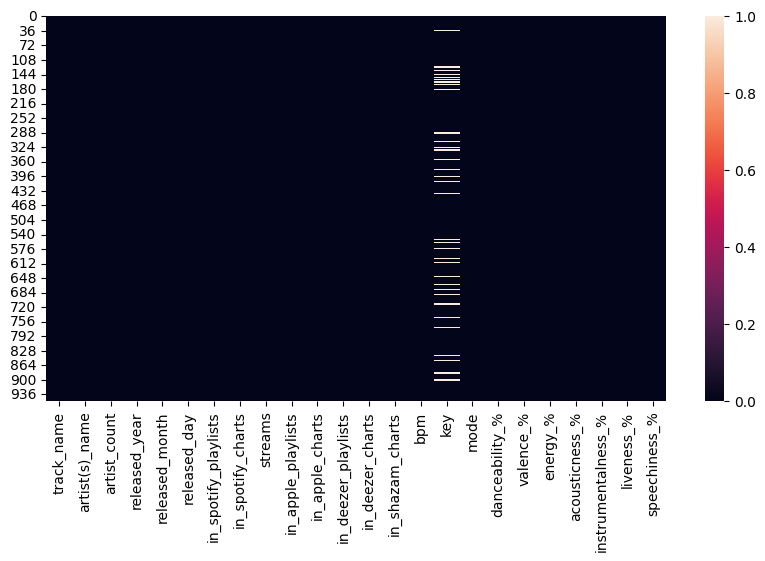

In [ ]:
# Heatmap showing missing values in the `key` column
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull(), ax=ax)
plt.show()

🔧 Giờ ta sẽ thực hiện điền các giá trị thiếu cho cột `key`. Trước tiên ta sẽ xem xét các giá trị của cột này.

In [ ]:
df['key'].value_counts().to_frame()

,count
key,
C#,120
G,96
G#,91
F,89
B,81
D,81
A,75
F#,73
E,62


❌We can apply the `mode` method to fill in missing values for the `key` column, but in reality, this approach is not really effective. Alternatively, we can identify the missing keys based on the `track_name` and `artist(s)_name` to find out the appropriate values for those missing entries. <br>
✅ Lukily, We can use web scrapping from `Spotify`. There is a code that we can use to get the `key` of a song from `Spotify`, i get this code from [here](https://www.kaggle.com/code/andrsgyrefi/spotify-analysis).

In [ ]:
!pip install spotipy

   ---------------------------------------- 0.0/250.3 kB ? eta -:--:--
   --------------------------- ------------ 174.1/250.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 250.3/250.3 kB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import the spotipy library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up the Spotify API credentials
client_id = "24101b195b73495e9477d0e26779a9a3"
client_secret = "3c02a8aea8554a9899be23ddb3219c4f"

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_song_key(song_name):
    # Search for the song on Spotify
    results = sp.search(q = song_name, type="track", limit=1)
    tracks = results["tracks"]["items"]
    
    # Mapping of pitch class numbers to key names, rename from the offical Spotify to one which is more in-line with our database
    pitch_class_to_key = {
        0: 'C',
        1: 'C#',
        2: 'D',
        3: 'D#',
        4: 'E',
        5: 'F',
        6: 'F#',
        7: 'G',
        8: 'G#',
        9: 'A',
        10: 'A#',
        11: 'B'
    }
    
    if tracks:
        # Get the first track's ID
        track_id = tracks[0]["id"]
        
        # Retrieve the audio features for the track
        audio_features = sp.audio_features(track_id)[0]
        
        if audio_features:
        # Convert the pitch class to a key name
            key = pitch_class_to_key[audio_features['key']]
            return key
        else:
            return "Audio features not found."
    else:
        return "Song not found."

In [ ]:
#Get the list of songs without a key based on name 
keyless = df.loc[df["key"].isnull(),"track_name"].tolist()
#Create a dictionary for the song-key pairs
song_keys = {}
for song in keyless:
    key = get_song_key(song)
    song_keys[(song)] = key

In [ ]:
# Replace the null values based on our new data
for index, row in df.iterrows():
    if row["track_name"] in song_keys:
       df.loc[index, "key"] = song_keys[row["track_name"]]

🕵️ Check the number of different values in `key` column after filling missing values.

In [ ]:
print(df["key"].value_counts().to_frame())

     count
key       
C#     121
G       96
G#      93
F       90
C       85
D       83
B       81
A       76
F#      74
E       62
A#      60
D#      32


In [ ]:
print(f"The number of missing values in `key` column after fill in: {df['key'].isna().sum()}")

The number of missing values in `key` column after fill in: 0


✅ Afer filling missing values, there is new value in `key` column: `C`. It seems mostly `C` was missing from the `key` column.

In [ ]:
df.to_csv('./data/processed_spotify-2023.csv', index=False)

### 5.2  Different values in each categorical column

✅ `track_name` has many different values because each song has a different name so it is understandable.

🕵️ We will explore the  `artist(s)_name`, `key` and `mode` columns.

In [ ]:
categorical_cols['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

- First 30 artist with highest numbers of songs

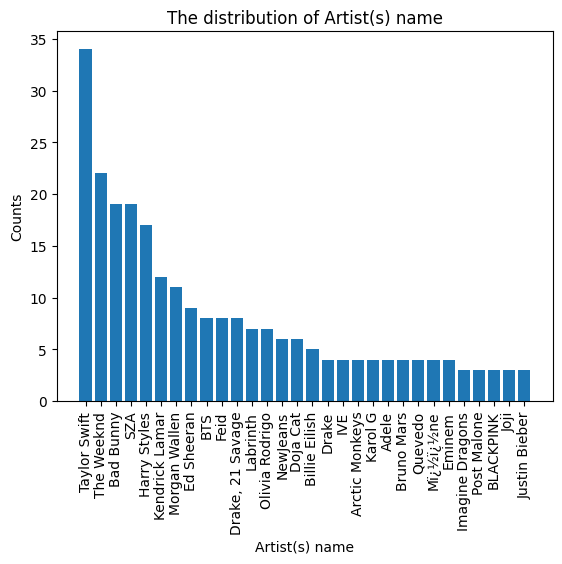

<Figure size 2000x1000 with 0 Axes>

In [ ]:
artist_name_count = categorical_cols['artist(s)_name'].value_counts()[:30]
plt.bar(artist_name_count.index, artist_name_count.values);
plt.xticks(rotation=90)
plt.xlabel('Artist(s) name')
plt.ylabel('Counts')
plt.title('The distribution of Artist(s) name')
plt.figure(figsize=(20, 10))
plt.show();

- The distribution of `key`

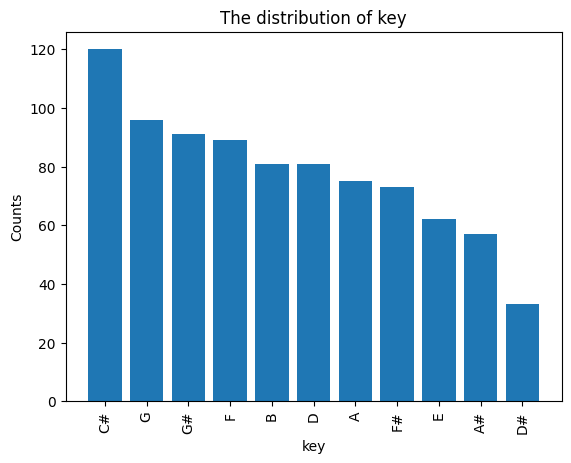

<Figure size 2000x1000 with 0 Axes>

In [ ]:
key_counts = categorical_cols['key'].value_counts()

plt.bar(key_counts.index, key_counts.values);
plt.xticks(rotation=90)
plt.title('The distribution of key')
plt.xlabel('key')
plt.ylabel('Counts')
plt.figure(figsize=(20, 10))
plt.show();

- The distribution of `mode`

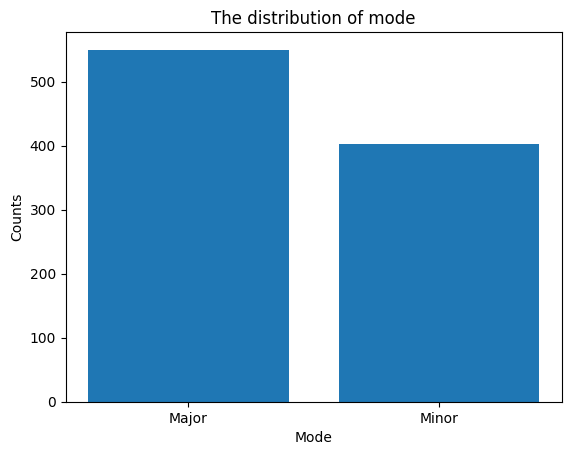

<Figure size 2000x1000 with 0 Axes>

In [ ]:
mode_counts = categorical_cols['mode'].value_counts()
plt.bar(mode_counts.index, mode_counts.values);
plt.xticks()
plt.ylabel('Counts')
plt.xlabel('Mode')
plt.title('The distribution of mode')
plt.figure(figsize=(20, 10))
plt.show();

- How many different values? Show a few

In [ ]:
for idx, col in enumerate(df.columns, start=1):
  print(df[col].value_counts())
  print('--------------------')
  print()
  if idx % 5 == 0:
    break

track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64
--------------------

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64
--------------------

artist_count
1  

## 6. Check abnormal values

- After visualizing and analyzing generally, we can make a conclusion that the dataset is suitable enough for us to use for training model and make questions and assumption from it. But before that, we need to preprocessing some values that have missing values in them

## 7. Correlation between attributes

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')

plt.show();